# Measuring <font color='red'>Phenotype</font> in OpenSAFELY-TPP
This short report describes how <font color='red'>phenotype</font> can be identified in the OpenSAFELY-TPP database, and the strengths and weaknesses of the methods. This is a living document that will be updated to reflect changes to the OpenSAFELY-TPP database and the patient records within.

## OpenSAFELY
OpenSAFELY is an analytics platform for conducting analyses on Electronic Health Records inside the secure environment where the records are held. This has multiple benefits: 

* We don't transport large volumes of potentially disclosive pseudonymised patient data outside of the secure environments for analysis
* Analyses can run in near real-time as records are ready for analysis as soon as they appear in the secure environment
* All infrastructure and analysis code is stored in GitHub repositories, which are open for security review, scientific review, and re-use

A key feature of OpenSAFELY is the use of study definitions, which are formal specifications of the datasets to be generated from the OpenSAFELY database. This takes care of much of the complex EHR data wrangling required to create a dataset in an analysis-ready format. It also creates a library of standardised and validated variable definitions that can be deployed consistently across multiple projects. 

The purpose of this report is to describe all such variables that relate to <font color='red'>phenotype</font>, their relative strengths and weaknesses, in what scenarios they are best deployed. It will also describe potential future definitions that have not yet been implemented.

## Available Records
OpenSAFELY-TPP runs inside TPP’s data centre which contains the primary care records for all patients registered at practices using TPP’s SystmOne Clinical Information System. This data centre also imports external datasets from other sources, including A&E attendances and hospital admissions from NHS Digital’s Secondary Use Service, and death registrations from the ONS. More information on available data sources can be found within the OpenSAFELY documentation. 

In [118]:
from IPython.display import display, Markdown
from report_functions import *

In [1]:
### CONFIGURE OPTIONS HERE ###

# Import file
input_path = '../output/data/input_all.feather'
df_input = pd.read_feather(input_path)
# Definitions
definitions = ['ethnicity_5']

# Dates
date_min = '2019-01-01'
date_max = '2019-12-31'
time_delta = 'M'

# Min/max range
min_range = 1
max_range = 5

# Null value – 0 or NA
null = 0

# Covariates
demographic_covariates = ['age_band', 'sex', 'region', 'imd']
clinical_covariates = ['dementia', 'diabetes', 'hypertension', 'learning_disability']

In [120]:
# Preprocess data with configurations above
num_definitions = len(definitions)
df_occ = preprocess_data(input_path, definitions, demographic_covariates, clinical_covariates, date_min, date_max, time_delta, num_definitions, null)

_______
## Descriptive Statistics

### Occurrence

#### Unique Patients by Definition

In [6]:
import pandas as pd
from tabulate import tabulate
df_input = pd.read_feather(input_path)
print(tabulate(df_input, headers="ethnicity_5", tablefmt="grid"))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [122]:
for group in demographic_covariates:
    count_unique(df_occ, definitions, time_delta, 'patient', group)

,pat_ethnicity_5,pat_all_filled,pat_all_missing
age_band,,,
0-19,230.0,230.0,70.0
20-29,215.0,215.0,65.0
30-39,235.0,235.0,85.0
40-49,230.0,230.0,85.0
50-59,240.0,240.0,65.0
60-69,225.0,225.0,85.0
70-79,230.0,230.0,75.0
80+,250.0,250.0,75.0


,pat_ethnicity_5,pat_all_filled,pat_all_missing
sex,,,
F,3725.0,3725.0,1265.0
M,3865.0,3865.0,1210.0


,pat_ethnicity_5,pat_all_filled,pat_all_missing
region,,,
East Midlands,70.0,70.0,30.0
East of England,75.0,75.0,20.0
London,180.0,180.0,60.0
North East,95.0,95.0,30.0
North West,95.0,95.0,30.0
South East,125.0,125.0,65.0
West Midlands,65.0,65.0,20.0
Yorkshire and the Humber,65.0,65.0,25.0


,pat_ethnicity_5,pat_all_filled,pat_all_missing
imd,,,
100,595.0,595.0,195.0
200,580.0,580.0,190.0
300,615.0,615.0,225.0
400,625.0,625.0,190.0
500,610.0,610.0,180.0


In [123]:
for group in clinical_covariates:
    count_unique(df_occ, definitions, time_delta, 'patient', group)

,pat_ethnicity_5,pat_all_filled,pat_all_missing
dementia,,,
False,18655.0,18655.0,6165.0
True,90.0,90.0,30.0


,pat_ethnicity_5,pat_all_filled,pat_all_missing
diabetes,,,
False,18650.0,18650.0,6170.0
True,85.0,85.0,35.0


,pat_ethnicity_5,pat_all_filled,pat_all_missing
hypertension,,,
False,18600.0,18600.0,6175.0
True,100.0,100.0,25.0


,pat_ethnicity_5,pat_all_filled,pat_all_missing
learning_disability,,,
False,18635.0,18635.0,6175.0
True,90.0,90.0,30.0


#### Unique Patients Over Time

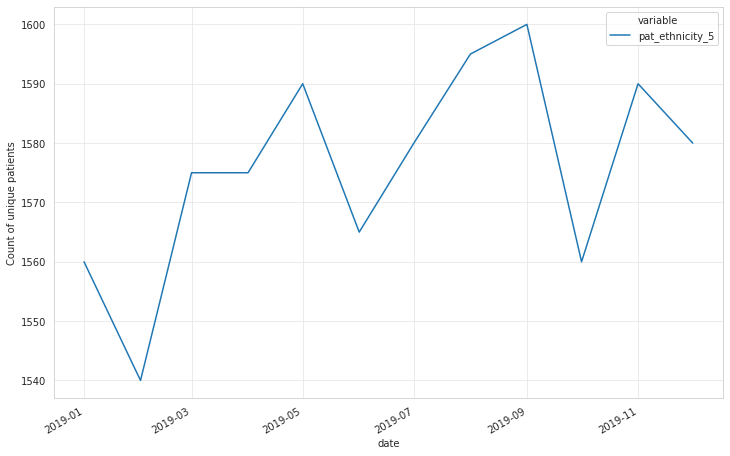

In [124]:
report_over_time(df_occ, definitions, 'patient')

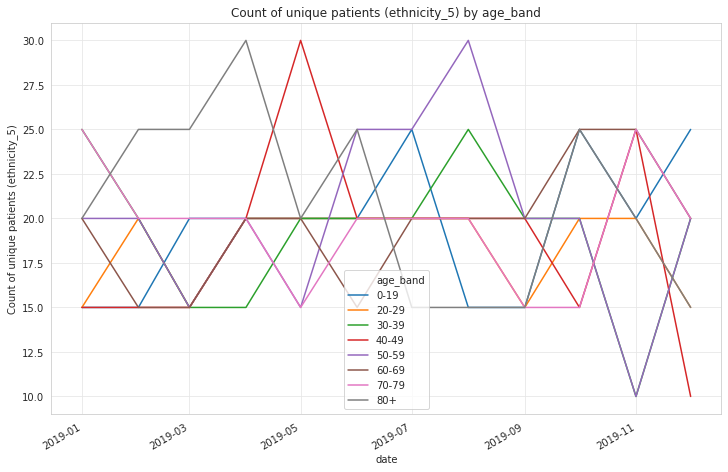

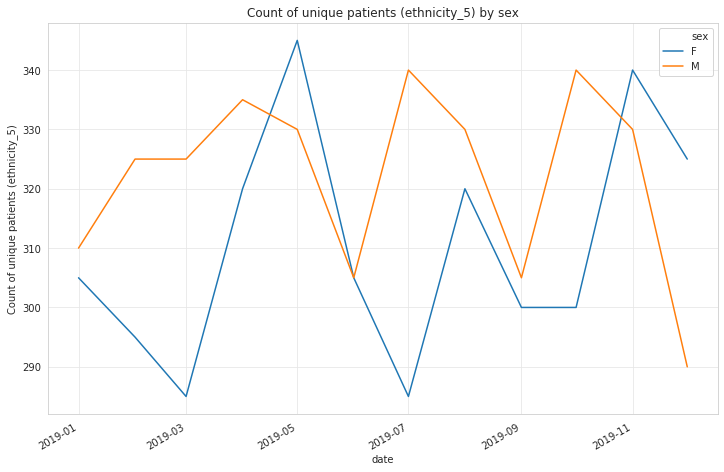

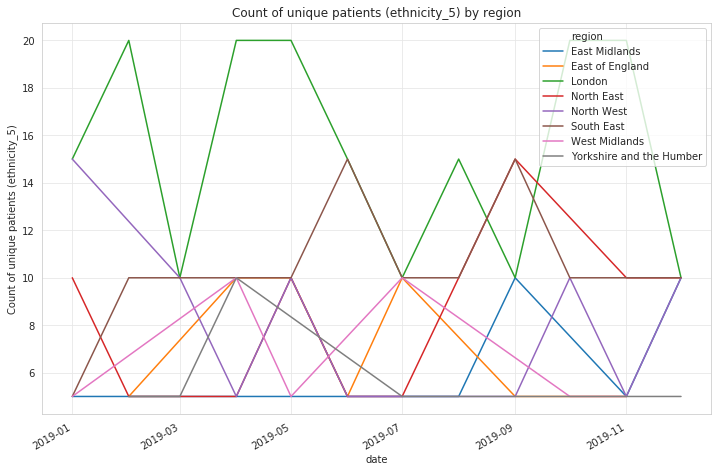

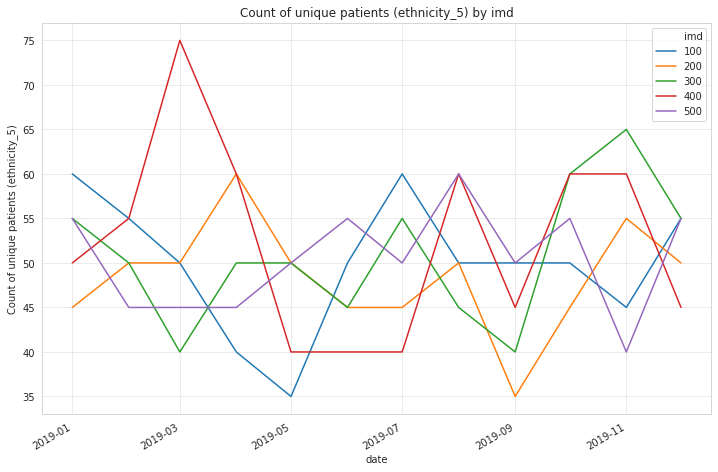

In [125]:
for group in demographic_covariates:
    report_over_time(df_occ, definitions, 'patient', group)

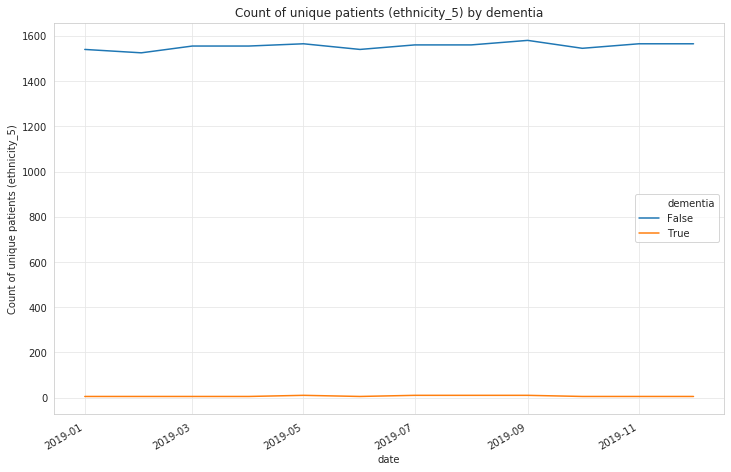

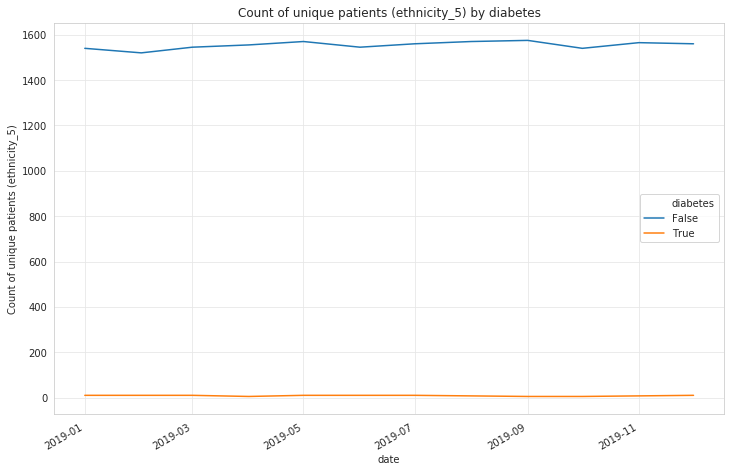

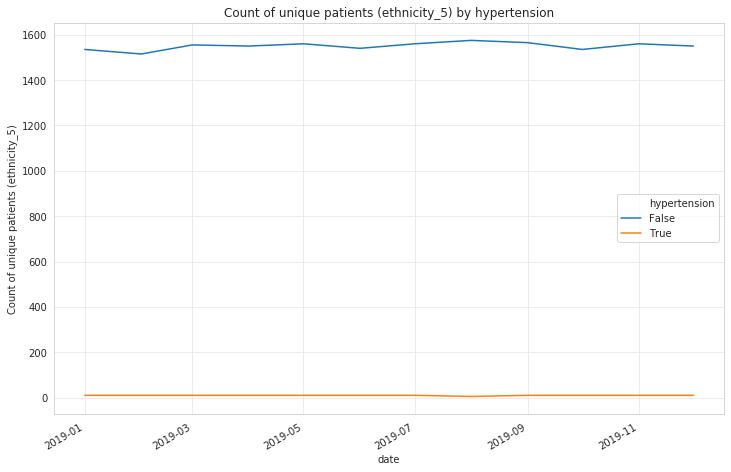

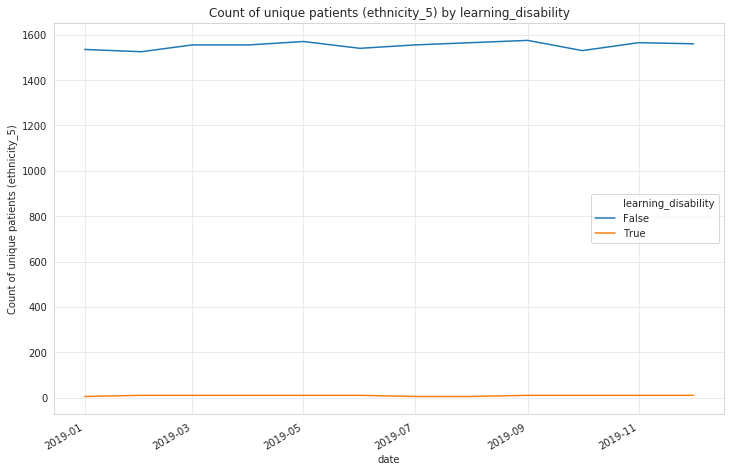

In [126]:
for group in clinical_covariates:
    report_over_time(df_occ, definitions, 'patient', group)

#### Unique Measurements by Definition

In [127]:
count_unique(df_occ, definitions, time_delta, 'measurement')

,counts
meas_ethnicity_5,9000000.0
meas_all_filled,9000000.0
meas_all_missing,3000000.0


In [128]:
for group in demographic_covariates:
    count_unique(df_occ, definitions, time_delta, 'measurement', group)

,meas_ethnicity_5,meas_all_filled,meas_all_missing
age_band,,,
0-19,148000.0,148000.0,47610.0
20-29,144670.0,144670.0,48105.0
30-39,149785.0,149785.0,51365.0
40-49,136275.0,136275.0,45740.0
50-59,141135.0,141135.0,46565.0
60-69,144105.0,144105.0,49965.0
70-79,134710.0,134710.0,44605.0
80+,132675.0,132675.0,44010.0


,meas_ethnicity_5,meas_all_filled,meas_all_missing
sex,,,
F,2246520.0,2246520.0,748730.0
M,2257520.0,2257520.0,753730.0


,meas_ethnicity_5,meas_all_filled,meas_all_missing
region,,,
East Midlands,40410.0,40410.0,13430.0
East of England,41570.0,41570.0,15035.0
London,151470.0,151470.0,53395.0
North East,40530.0,40530.0,12690.0
North West,31665.0,31665.0,10690.0
South East,151780.0,151780.0,55950.0
West Midlands,38675.0,38675.0,12345.0
Yorkshire and the Humber,37295.0,37295.0,11970.0


,meas_ethnicity_5,meas_all_filled,meas_all_missing
imd,,,
100,369530.0,369530.0,119525.0
200,360005.0,360005.0,123830.0
300,375685.0,375685.0,118490.0
400,342850.0,342850.0,119410.0
500,360075.0,360075.0,121265.0


In [129]:
for group in clinical_covariates:
    count_unique(df_occ, definitions, time_delta, 'measurement', group)

,meas_ethnicity_5,meas_all_filled,meas_all_missing
dementia,,,
False,8821890.0,8821890.0,2939310.0
True,890.0,890.0,310.0


,meas_ethnicity_5,meas_all_filled,meas_all_missing
diabetes,,,
False,8824860.0,8824860.0,2936340.0
True,860.0,860.0,340.0


,meas_ethnicity_5,meas_all_filled,meas_all_missing
hypertension,,,
False,8812980.0,8812980.0,2948220.0
True,980.0,980.0,220.0


,meas_ethnicity_5,meas_all_filled,meas_all_missing
learning_disability,,,
False,8821890.0,8821890.0,2939310.0
True,890.0,890.0,310.0


#### Unique Measurements Over Time

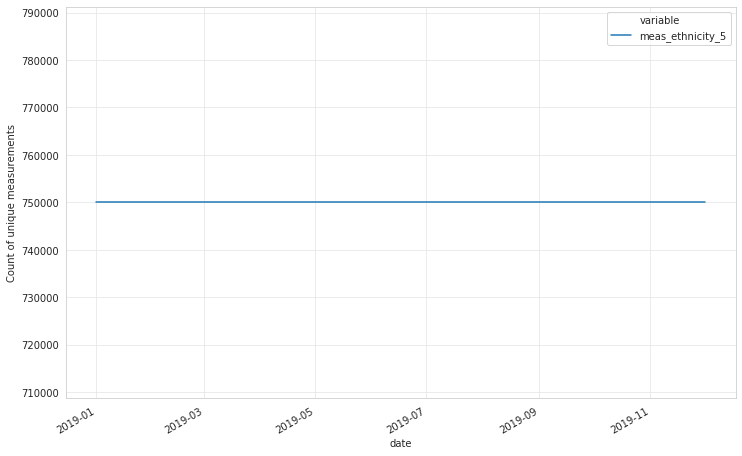

In [130]:
report_over_time(df_occ, definitions, 'measurement')

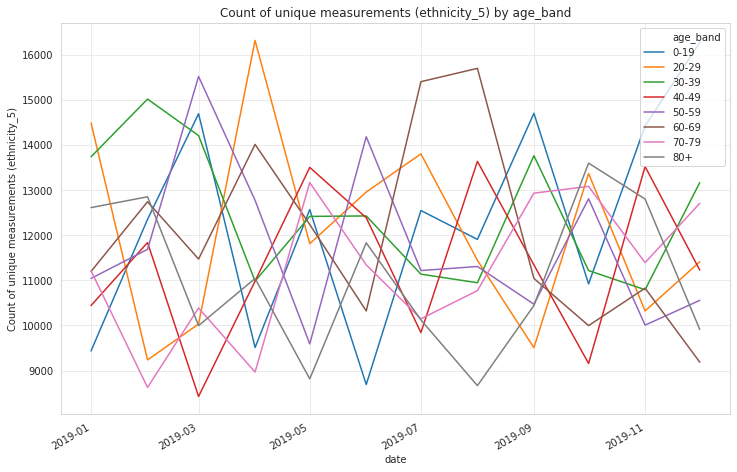

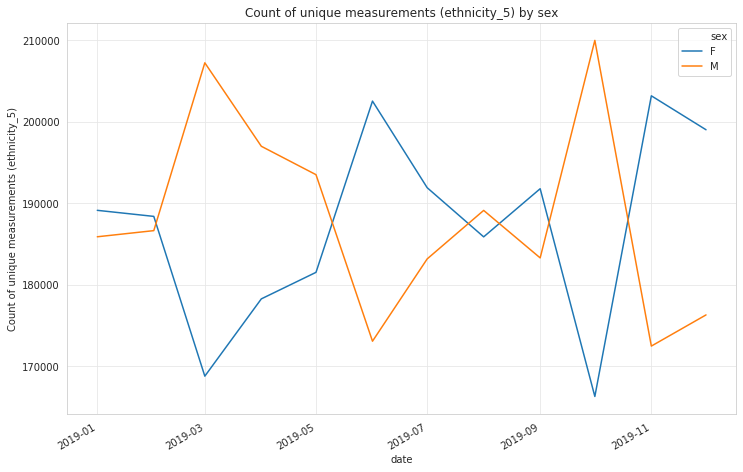

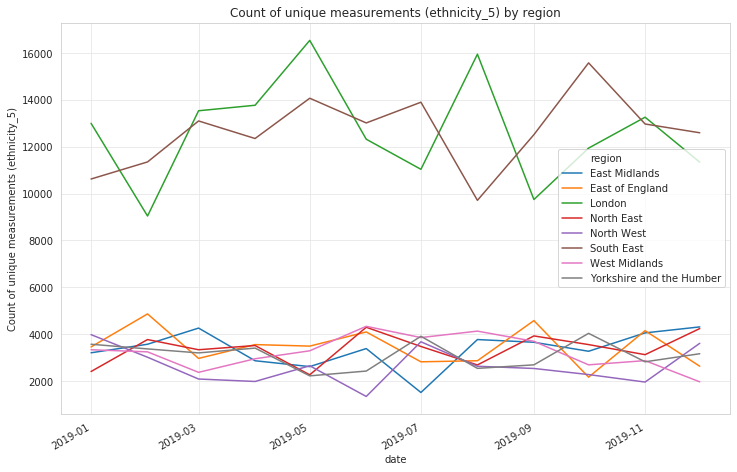

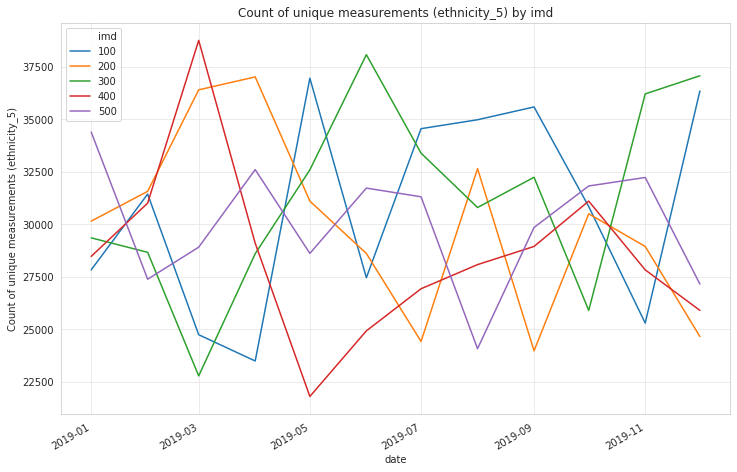

In [131]:
for group in demographic_covariates:
    report_over_time(df_occ, definitions, 'measurement', group)

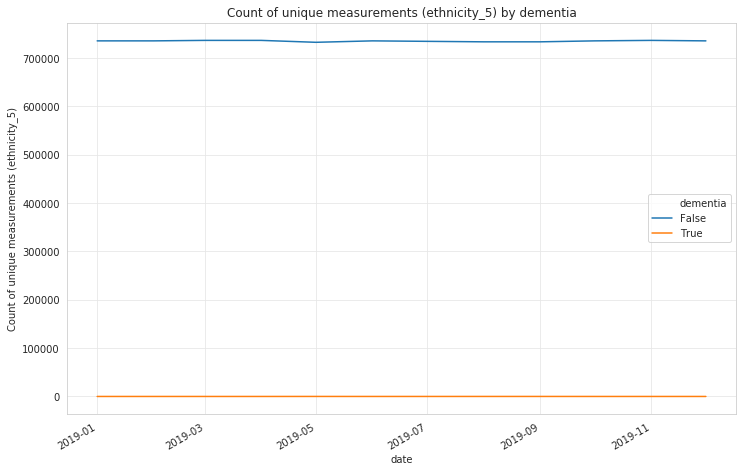

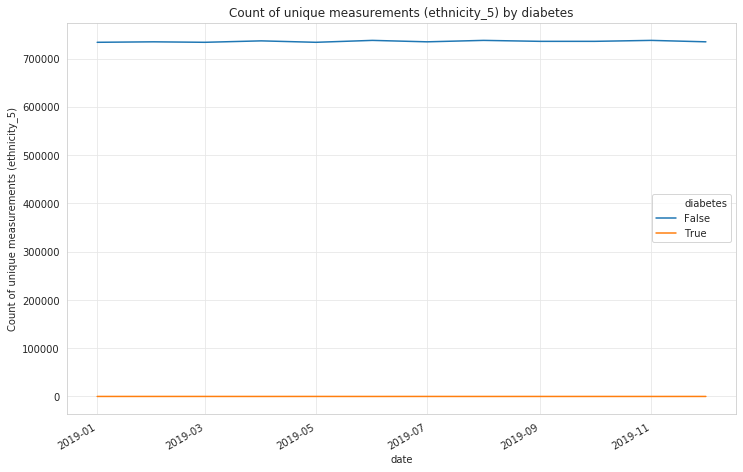

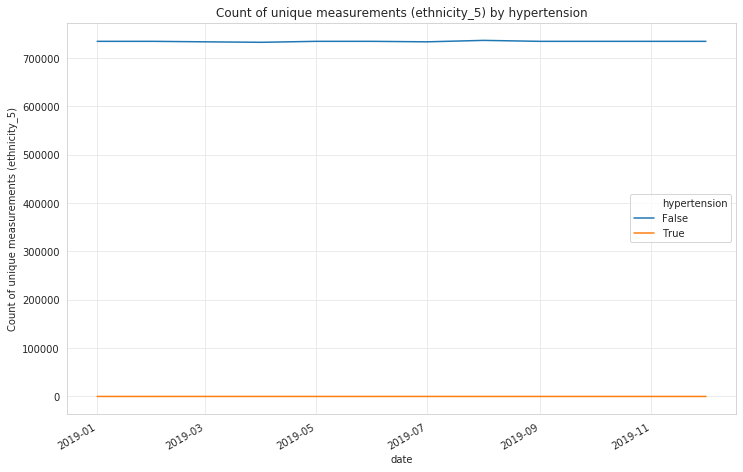

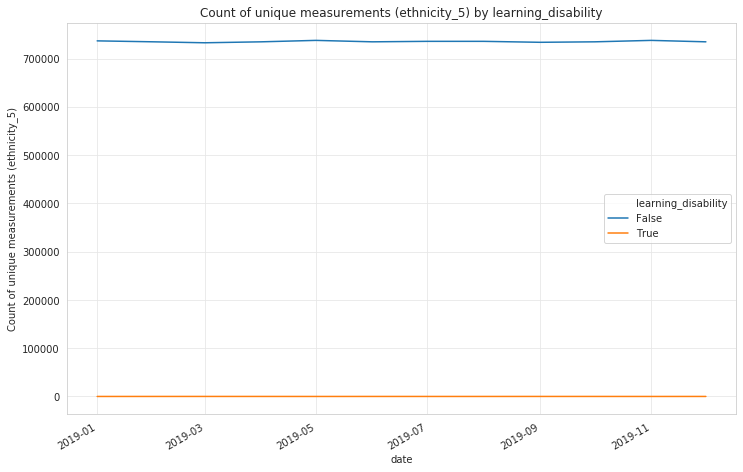

In [132]:
for group in clinical_covariates:
    report_over_time(df_occ, definitions, 'measurement', group)

#### Frequency of Update

In [133]:
# report_update_frequency(df_occ, definitions, time_delta, num_definitions)

Average update frequency by age_band and M:



,age_band,avg_diff,count
0,0-19,3.67089,630
1,20-29,3.7421,600
2,30-39,3.60131,610
3,40-49,3.61712,620
4,50-59,3.71429,580
5,60-69,3.74313,620
6,70-79,3.51248,600
7,80+,3.67288,590


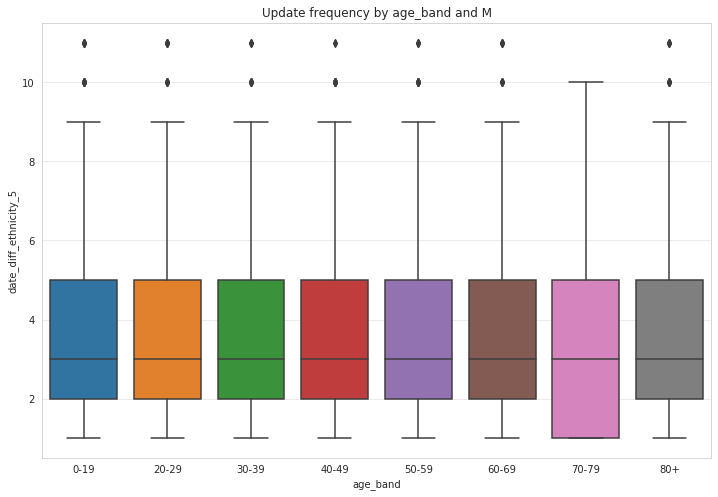

Average update frequency by sex and M:



,sex,avg_diff,count
0,F,3.62238,2385
1,M,3.69461,2470


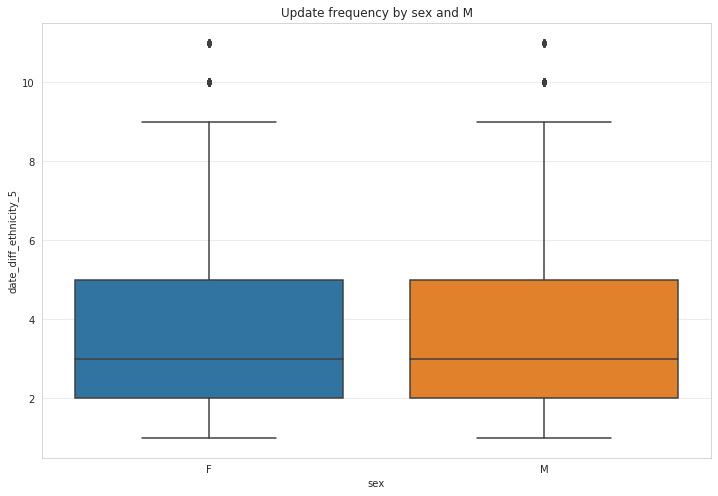

Average update frequency by region and M:



,region,avg_diff,count
0,East Midlands,3.5387,325
1,East of England,3.84641,305
2,London,3.64062,640
3,North East,3.78182,330
4,North West,3.80068,295
5,South East,3.72684,635
6,West Midlands,3.63889,325
7,Yorkshire and the Humber,3.69255,320


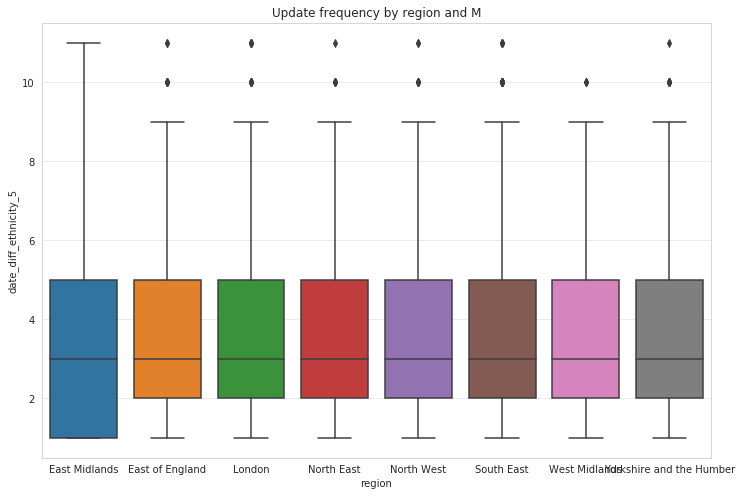

Average update frequency by imd and M:



,imd,avg_diff,count
0,100,3.63015,995
1,200,3.64263,955
2,300,3.71678,1030
3,400,3.6631,935
4,500,3.63927,935


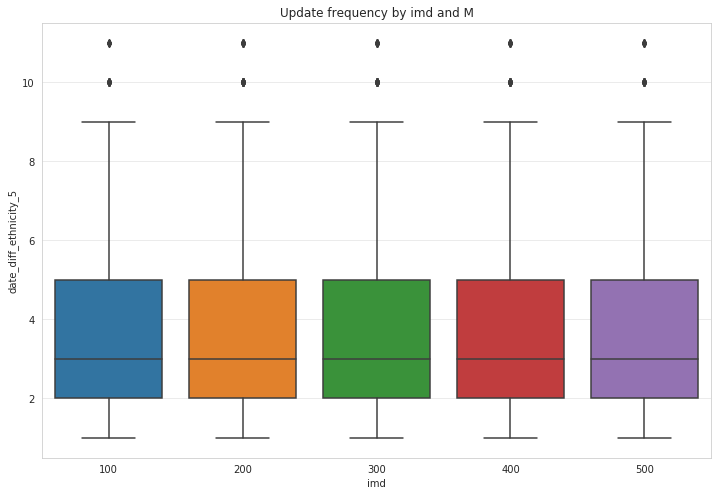

In [134]:
for group in demographic_covariates:
    report_update_frequency(df_occ, definitions, time_delta, num_definitions, group)

Average update frequency by dementia and M:



,dementia,avg_diff,count
0,False,3.6598,4810
1,True,3.58696,45


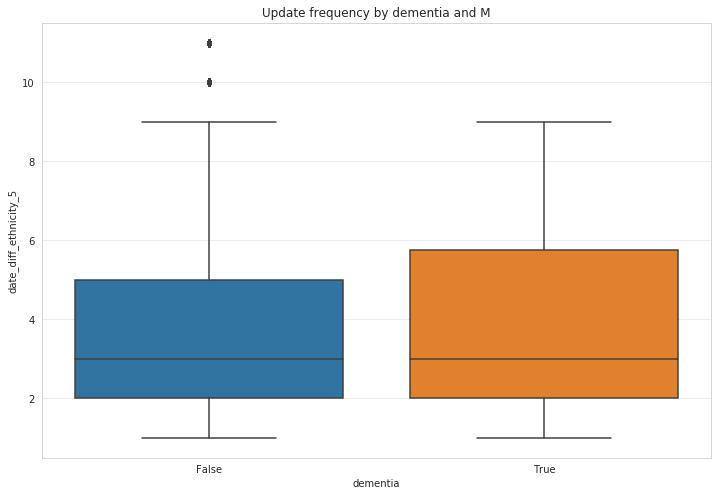

Average update frequency by diabetes and M:



,diabetes,avg_diff,count
0,False,3.66313,4810
1,True,3.2093,45


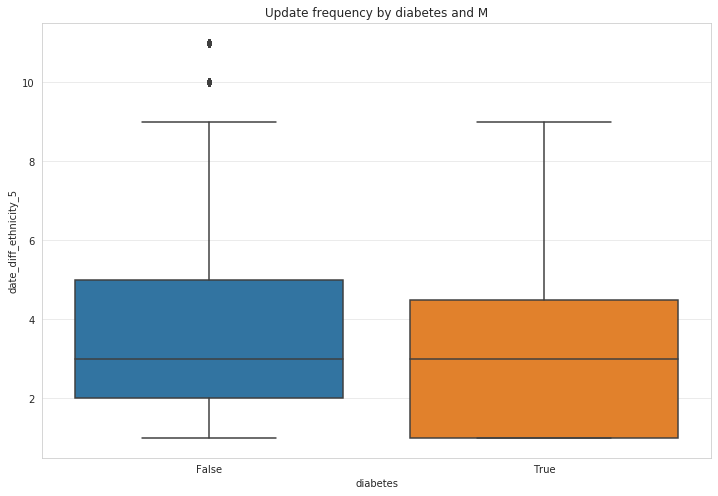

Average update frequency by hypertension and M:



,hypertension,avg_diff,count
0,False,3.66792,4795
1,True,2.93103,60


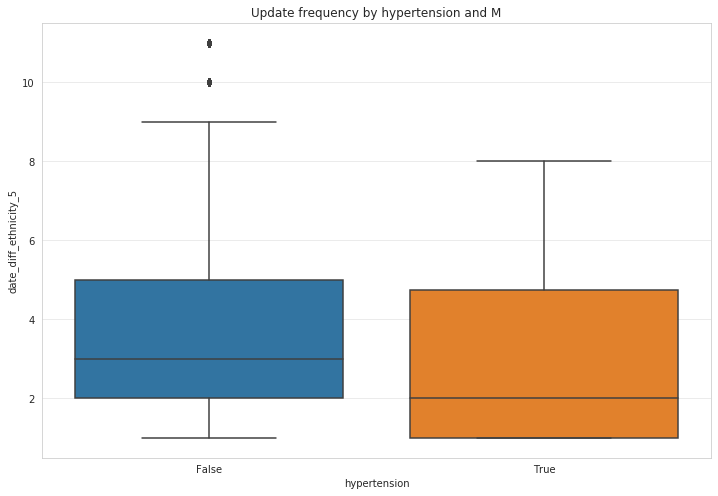

Average update frequency by learning_disability and M:



,learning_disability,avg_diff,count
0,False,3.65939,4810
1,True,3.63043,45


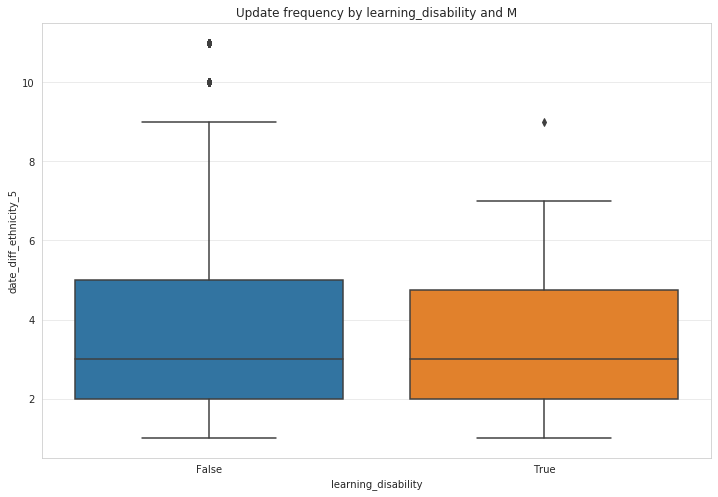

In [135]:
for group in clinical_covariates:
    report_update_frequency(df_occ, definitions, time_delta, num_definitions, group)

### Value

#### Values Out of Range

In [137]:
# Not Applicable
#report_out_of_range(df_occ, definitions, min_range, max_range, num_definitions, null)

In [ ]:
# for group in demographic_covariates:
#     report_out_of_range(df_occ, definitions, min_range, max_range, num_definitions, null, group)

In [ ]:
# for group in clinical_covariates:
#     report_out_of_range(df_occ, definitions, min_range, max_range, num_definitions, null, group)

#### Distributions

In [138]:
report_distribution(df_occ, definitions, num_definitions)

TypeError: aggregate() missing 1 required positional argument: 'func'

In [139]:
for group in demographic_covariates:
    report_distribution(df_occ, definitions, num_definitions, group)

DataError: No numeric types to aggregate

In [140]:
for group in clinical_covariates:
    report_distribution(df_occ, definitions, num_definitions, group)

DataError: No numeric types to aggregate

#### Measures Over Time

TypeError: No matching signature found

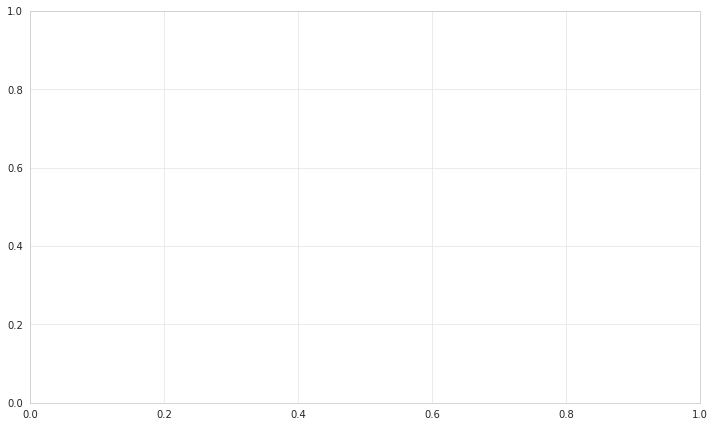

In [141]:
measure_over_time(df_occ, definitions)

TypeError: No matching signature found

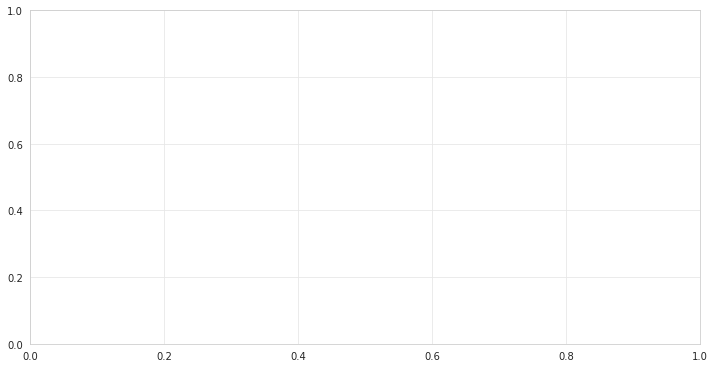

In [142]:
for group in demographic_covariates:
    measure_over_time(df_occ, definitions, group)

TypeError: No matching signature found

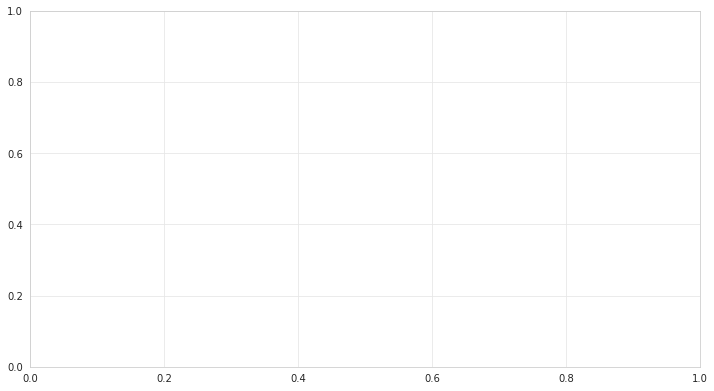

In [143]:
for group in clinical_covariates:
    measure_over_time(df_occ, definitions, group)

In [144]:
# Comparison only runs if more than 1 definition provided
if num_definitions > 1: 
    display(Markdown("""#### Comparison Across Definitions
    """))
    
    compare_value(df_occ, definitions)
    
    for group in demographic_covariates:
        compare_value(df_occ, definitions, group)
    
    for group in clinical_covariates:
        compare_value(df_occ, definitions, group)

## Discussion

<font color='red'>To fill.</font>

The purpose of this live report is to bring a systematic approach to creating, documenting, cross-checking, and sharing variables to improve analyses in OpenSAFELY-TPP. If you have improvements or edits to this report, please contact <font color='red'>owner</font>.